In [1]:

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

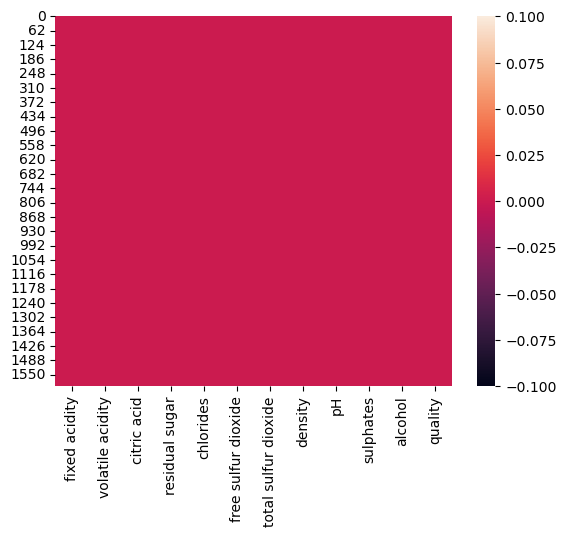

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


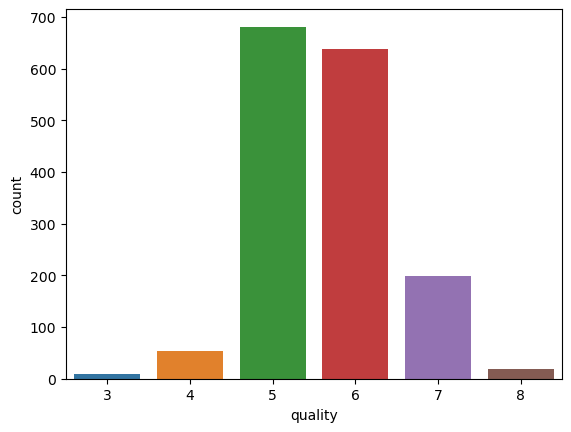

In [12]:
sns.countplot(df['quality'])
plt.show()

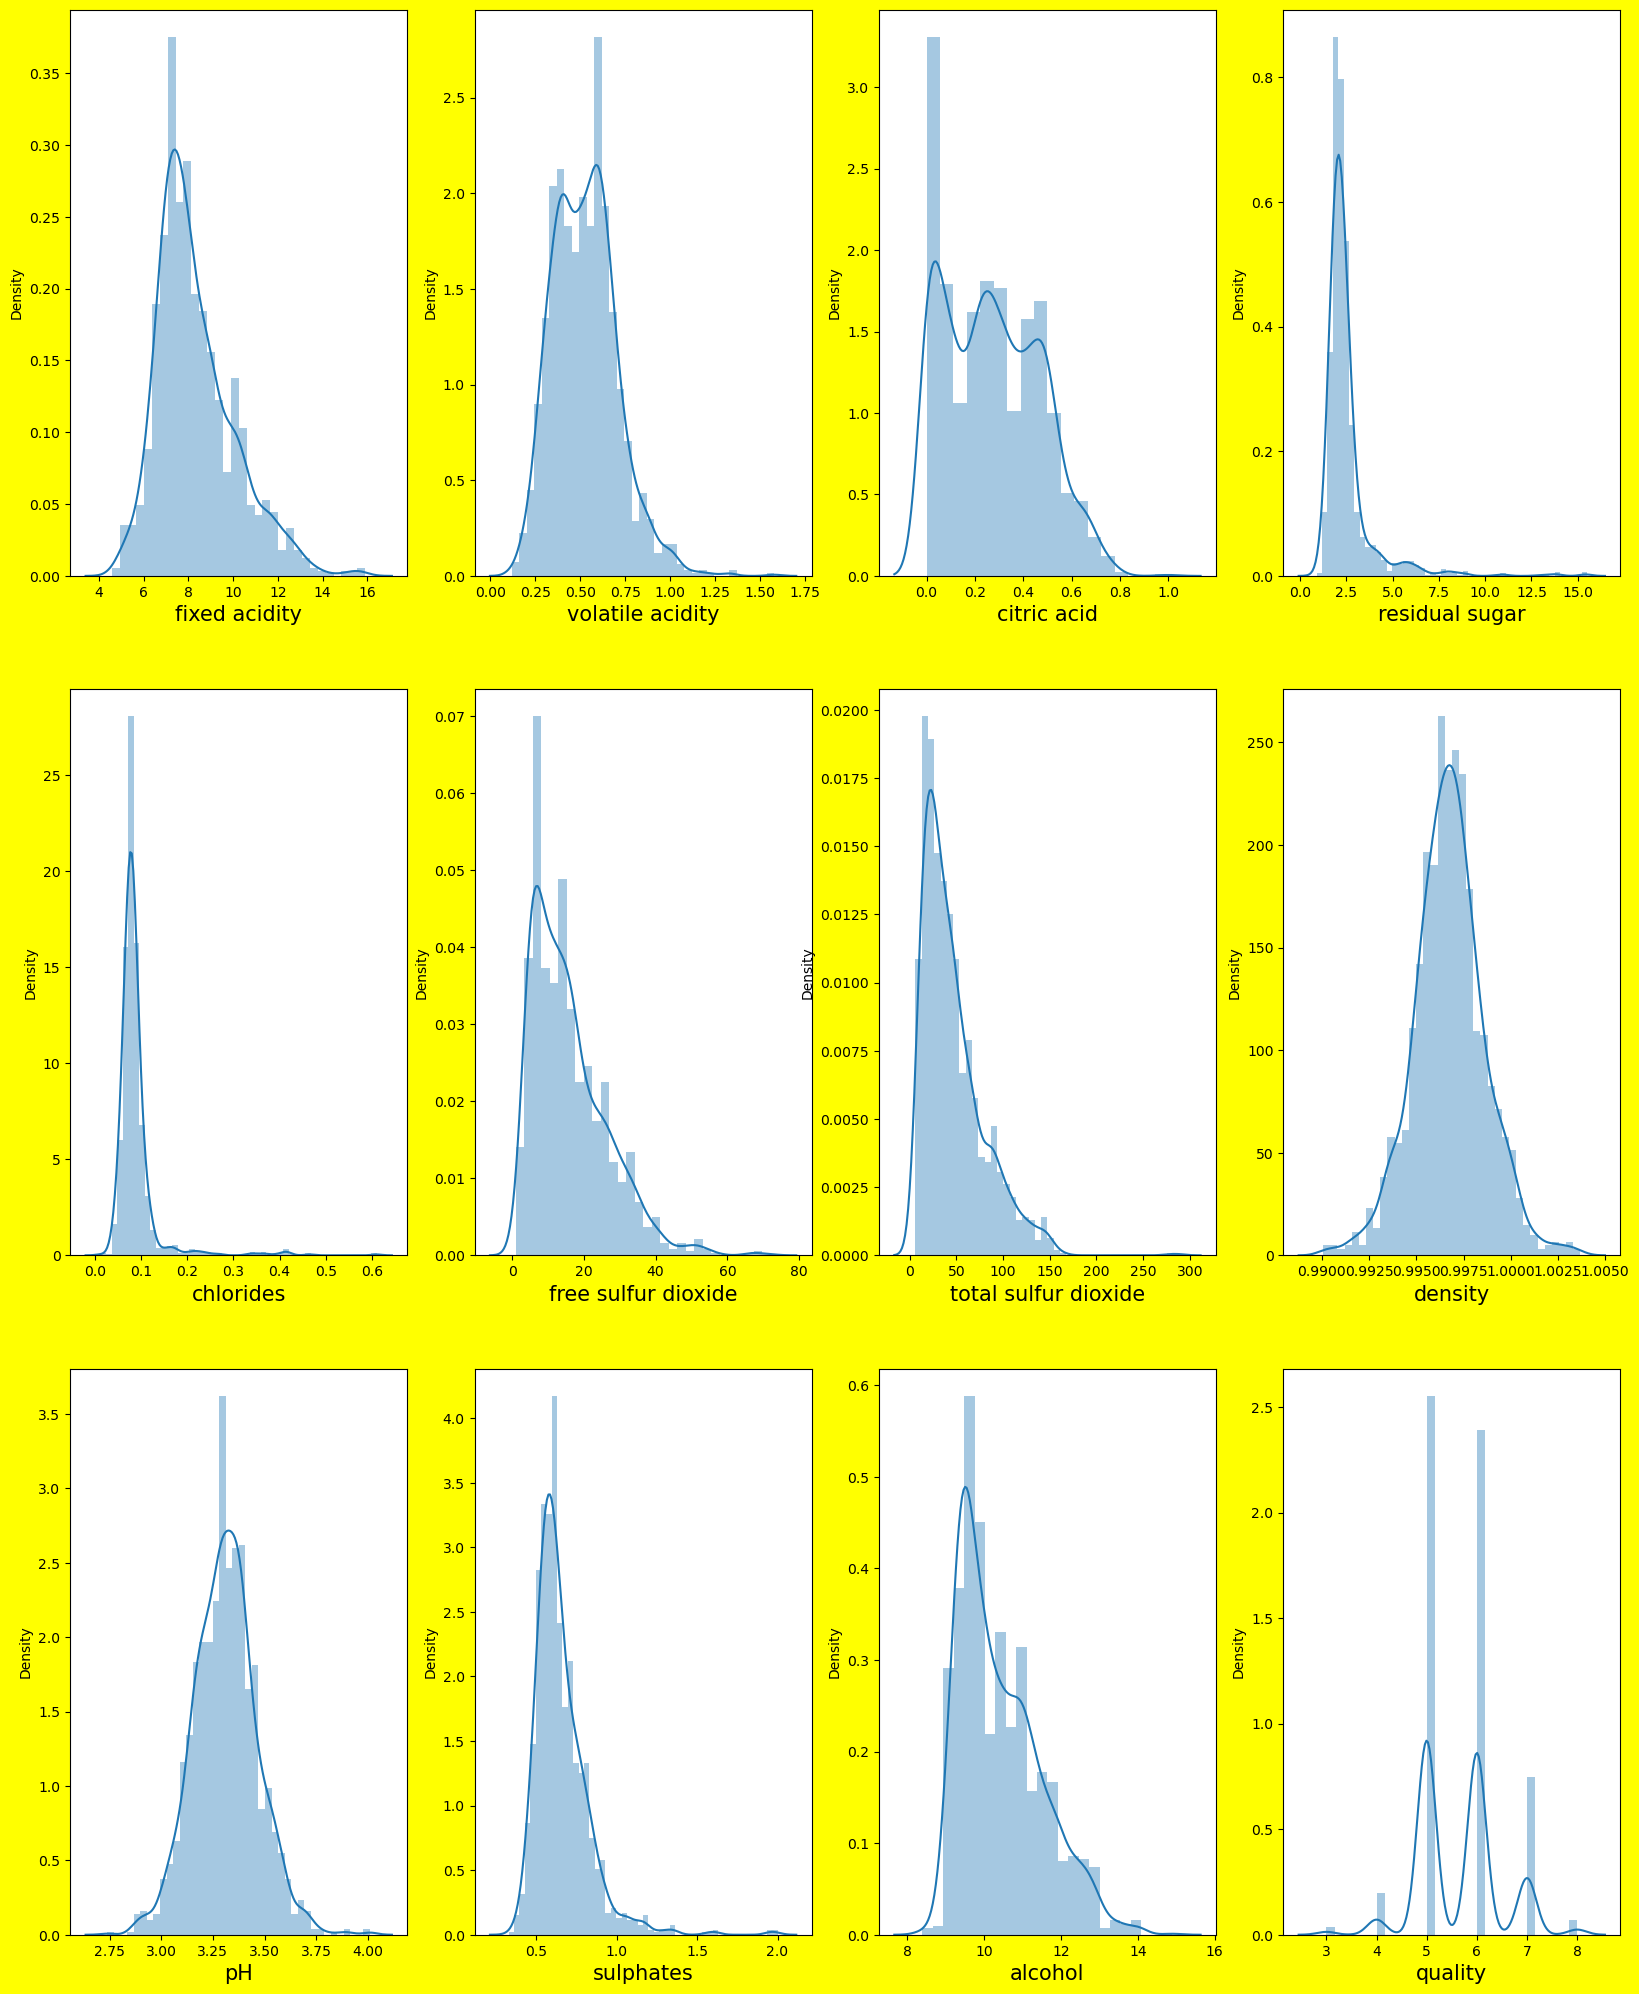

In [13]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1

for column in df:
    if graph<=12:
        plt.subplot(3,4,graph)
        ax=sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()    

In [14]:
#DATA SEEMS OK

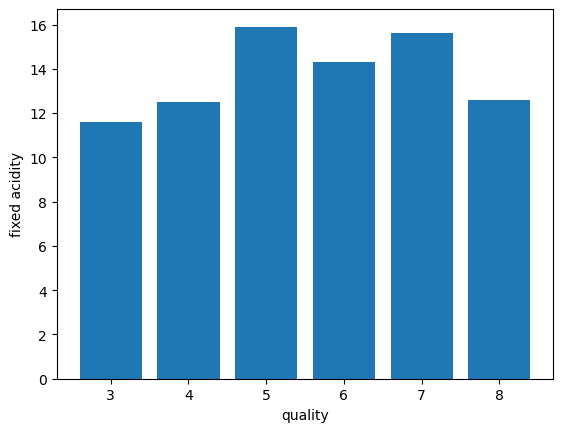

In [15]:
#QUALITY VS. FIXED ACIDITY
plt.bar(df['quality'],df['fixed acidity'])
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.show()

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

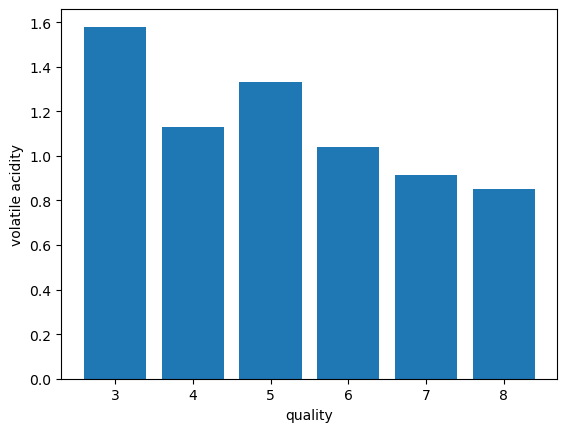

In [17]:
plt.bar(df['quality'],df['volatile acidity'])
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.show()

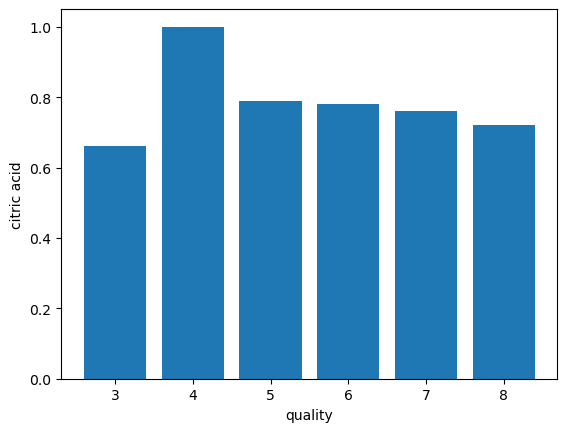

In [18]:
plt.bar(df['quality'],df['citric acid'])
plt.xlabel('quality')
plt.ylabel('citric acid')
plt.show()

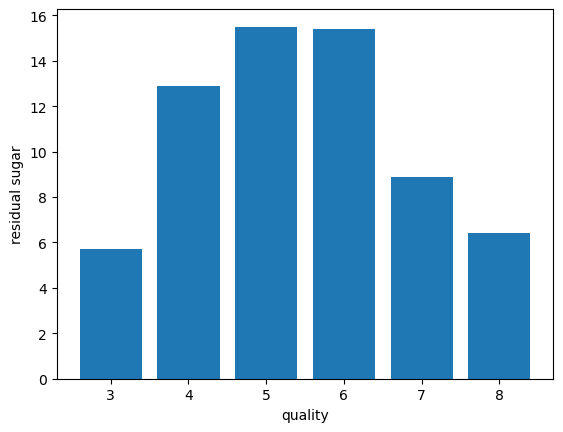

In [19]:
plt.bar(df['quality'],df['residual sugar'])
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.show()

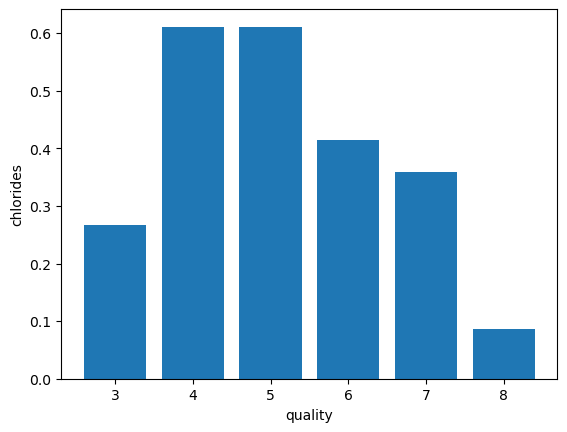

In [20]:
plt.bar(df['quality'],df['chlorides'])
plt.xlabel('quality')
plt.ylabel('chlorides')
plt.show()

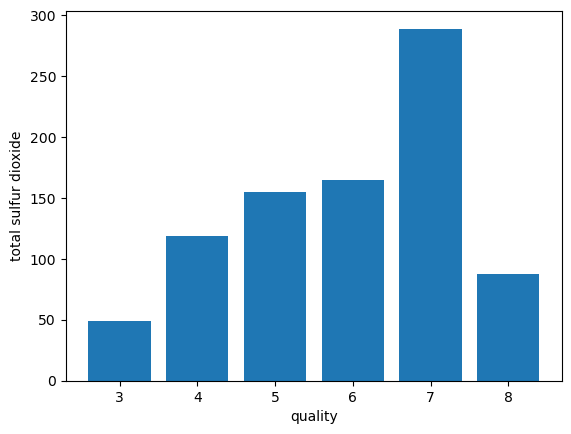

In [21]:
plt.bar(df['quality'],df['total sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.show()

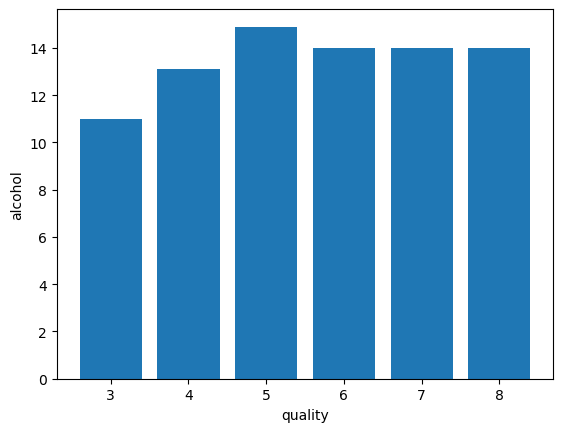

In [22]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


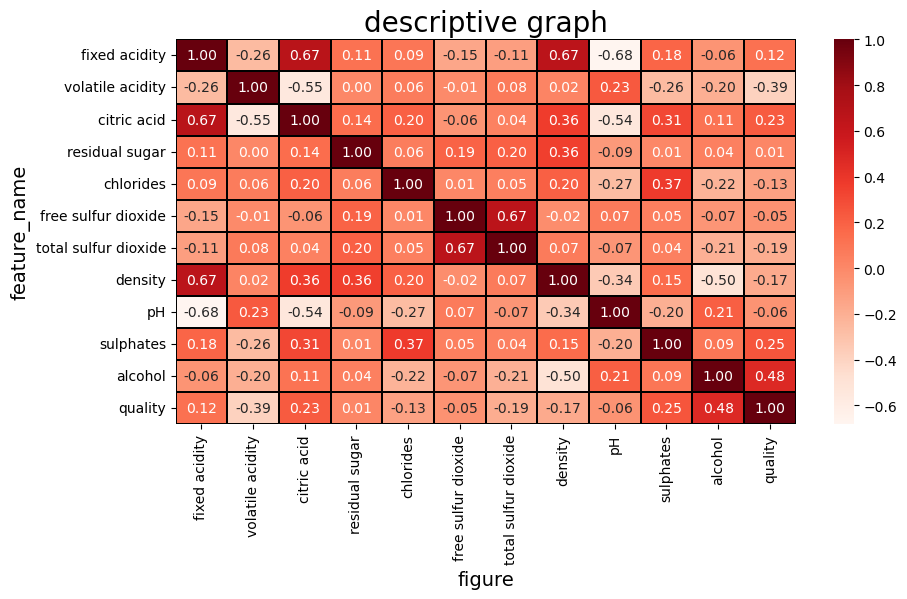

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Reds')
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_name',fontsize=14)
plt.title('descriptive graph',fontsize=20)
plt.show()

In [25]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [26]:
df['quality']=[1 if x>=7 else 0 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [27]:
df['quality'].unique()

array([0, 1])

In [28]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

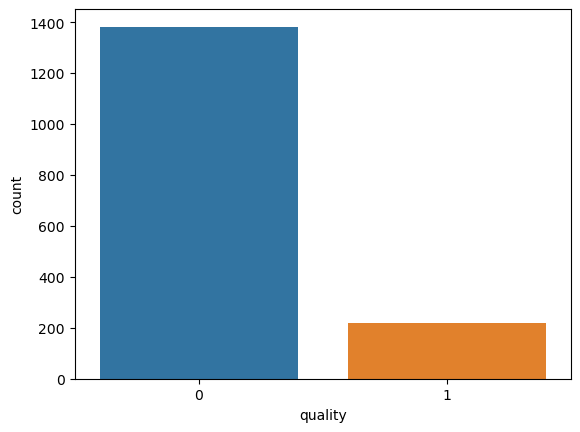

In [29]:
sns.countplot(df['quality'])
plt.show()

In [30]:
#this shows data is imbalanced



In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.over_sampling import SMOTE

x_res,y_res=SMOTE().fit_resample(x,y)

y_res.value_counts()

NameError: name 'x' is not defined

In [ ]:
x=df.drop('quality',axis=1)
y=df['quality']

In [ ]:
x

In [ ]:
y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=.20,random_state=42)

In [ ]:
print(y.shape,y_train.shape,y_test.shape)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

In [86]:
#feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
t=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
t

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,-1.970587,-1.294260
1,-1.509965,-0.989591,0.509621,-0.078767,0.507463,0.620653
2,-0.797954,-0.989591,0.383307,1.580926,0.507463,0.620653
3,-0.441948,-0.989591,-1.305531,-0.908614,0.507463,-0.655956
4,-0.513149,-0.989591,-0.292556,-0.908614,0.507463,-0.655956
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,0.507463,-0.655956
1334,-1.509965,1.010519,0.206139,-0.908614,0.507463,1.258958
1335,-1.509965,1.010519,1.014878,-0.908614,0.507463,0.620653
1336,-1.296362,1.010519,-0.797813,-0.908614,0.507463,-1.294260


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))
print(f1_score(y_test,pred))

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
dtc=DecisionTreeRegressor()
sv=SVC()
knn=KNeighborsClassifier()
mnb=MultinomialNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()




model=[dtc,sv,knn,mnb,RFC,GBC]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    
    print('\n')

In [ ]:
pd.DataFrame({'models':['dtc','sv','knn','mnb','RFC','GBC'],
             'Accuracy':[90,73,85,59,93,90]})

# RANDOM FOREST IS OUR BEST MODEL

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob=RFC.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive RATE')
plt.ylabel('true positive rate')
plt.title('RandomForestClassifier')
plt.show()

auc_score=roc_auc_score(y_test,RFC.predict(x_test))

print(auc_score)

In [ ]:
import pickle
filename='WINEQUALITY.pk1'
pickle.dump(m,open(filename,'wb'))    #saved model

In [ ]:
import pickle
loaded_model=pickle.load(open('WINEQUALITY.pk1','rb'))


# QUESTION2

In [53]:
data=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")

In [54]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
data.shape

(1338, 7)

In [56]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [58]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

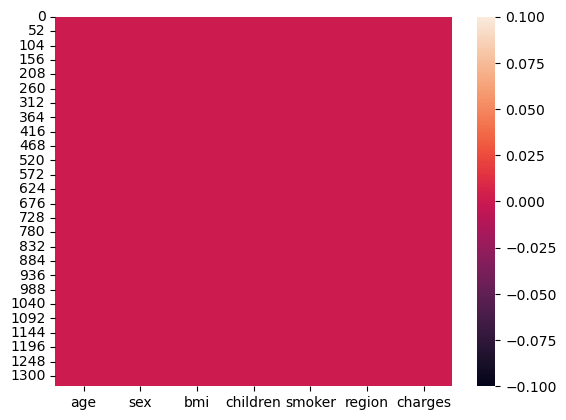

In [59]:
sns.heatmap(data.isnull())

data.describe()

In [60]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [61]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

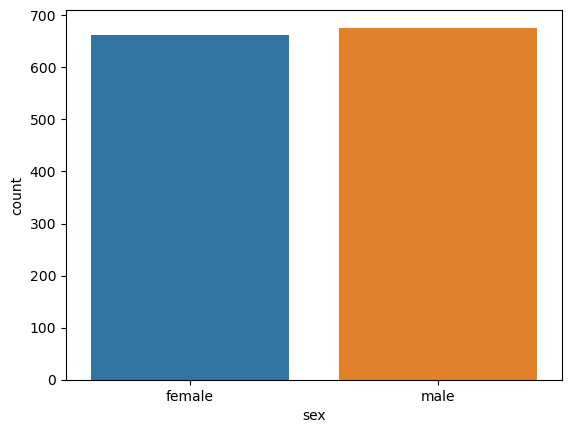

In [62]:
sns.countplot(data['sex'])
plt.show()

In [63]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

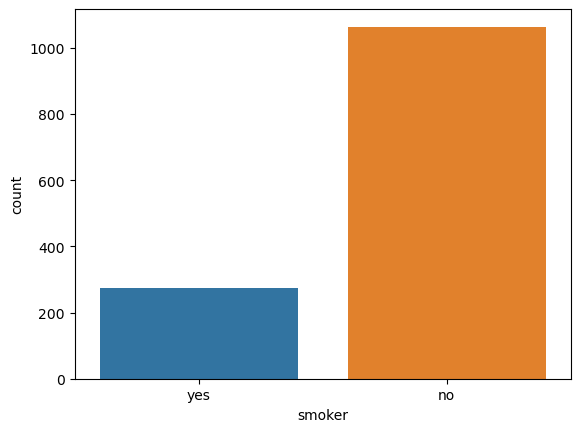

In [64]:
sns.countplot(data['smoker'])
plt.show()

In [65]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

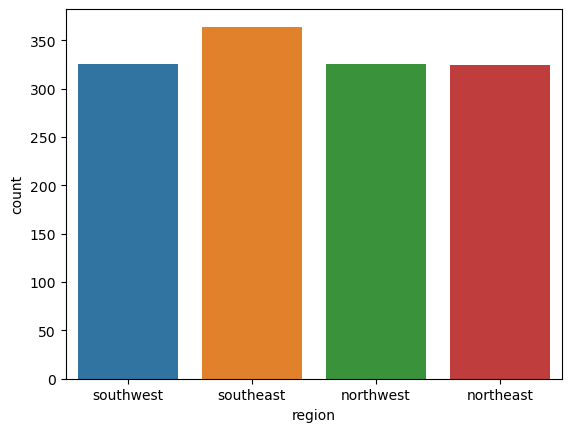

In [66]:
sns.countplot(data['region'])
plt.show()

<AxesSubplot:xlabel='children', ylabel='count'>

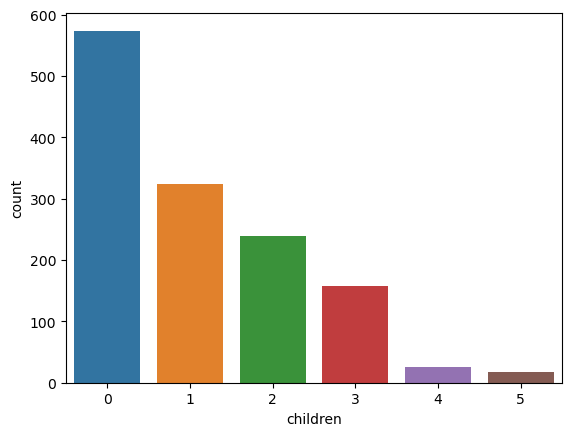

In [67]:
sns.countplot(data['children'])

In [68]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

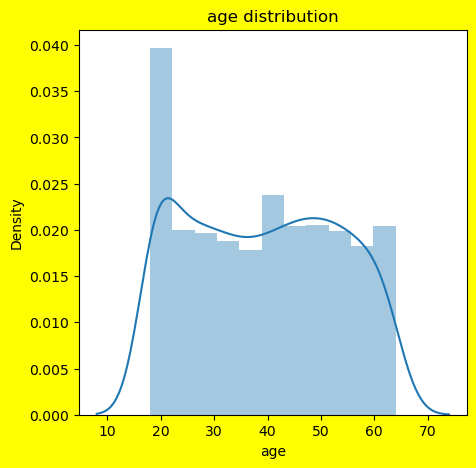

In [69]:
plt.figure(figsize=(5,5),facecolor='yellow')
sns.distplot(data['age'])
plt.title('age distribution')
        
   
plt.show()    

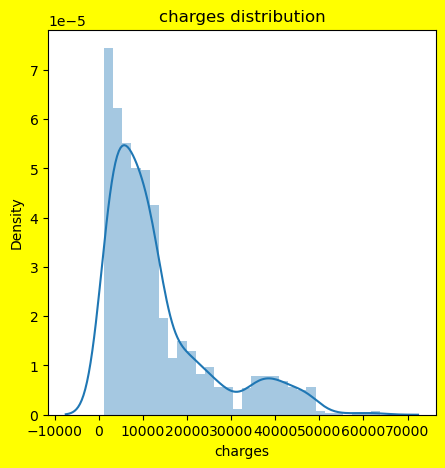

In [70]:
plt.figure(figsize=(5,5),facecolor='yellow')
sns.distplot(data['charges'])
plt.title('charges distribution')
        
   
plt.show()

In [71]:
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,0,southwest,16884.92400
1,18,male,33.770,1,1,southeast,1725.55230
2,28,male,33.000,3,1,southeast,4449.46200
3,33,male,22.705,0,1,northwest,21984.47061
4,32,male,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,1,northwest,10600.54830
1334,18,female,31.920,0,1,northeast,2205.98080
1335,18,female,36.850,0,1,southeast,1629.83350
1336,21,female,25.800,0,1,southwest,2007.94500


In [72]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,northwest,10600.54830
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [73]:
data.replace({'region':{'southwest':0,'northwest':1,'southeast':3,'northeast':4}},inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,3,1725.55230
2,28,0,33.000,3,1,3,4449.46200
3,33,0,22.705,0,1,1,21984.47061
4,32,0,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,10600.54830
1334,18,1,31.920,0,1,4,2205.98080
1335,18,1,36.850,0,1,3,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


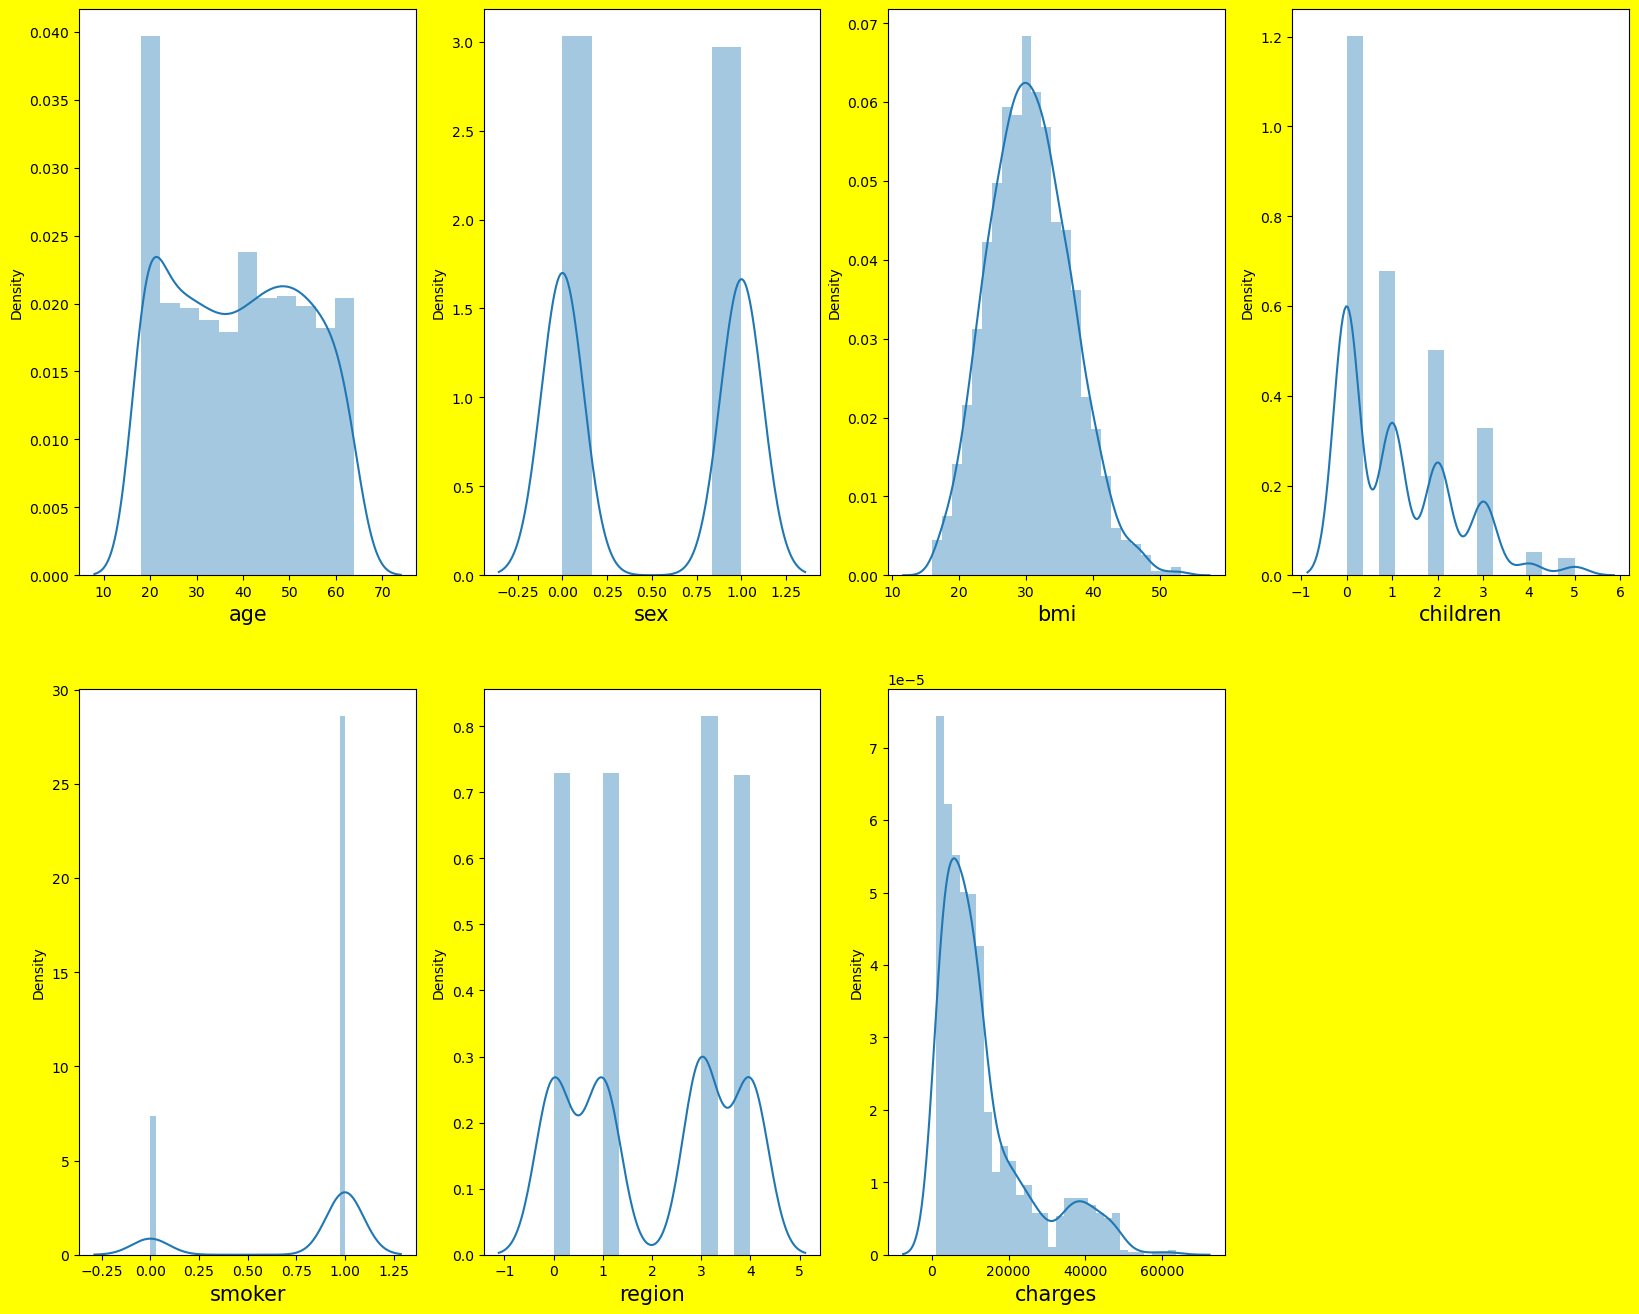

In [74]:
plt.figure(figsize=(20,25),facecolor='yellow')
graph=1

for column in data:
    if graph<=12:
        plt.subplot(3,4,graph)
        ax=sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    graph+=1
plt.show()    

In [75]:
x=data.drop("charges",axis=1)
y=data['charges']

In [76]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,0
1,18,0,33.770,1,1,3
2,28,0,33.000,3,1,3
3,33,0,22.705,0,1,1
4,32,0,28.880,0,1,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1
1334,18,1,31.920,0,1,4
1335,18,1,36.850,0,1,3
1336,21,1,25.800,0,1,0


In [77]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [78]:
x.shape

(1338, 6)

In [79]:
y.shape

(1338,)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [81]:
x_train.shape

(1070, 6)

In [82]:
y_train.shape

(1070,)

In [83]:
x_test.shape

(268, 6)

In [84]:
y_test.shape

(268,)

In [87]:
scaler=StandardScaler()
t=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
t

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,-1.970587,-1.294260
1,-1.509965,-0.989591,0.509621,-0.078767,0.507463,0.620653
2,-0.797954,-0.989591,0.383307,1.580926,0.507463,0.620653
3,-0.441948,-0.989591,-1.305531,-0.908614,0.507463,-0.655956
4,-0.513149,-0.989591,-0.292556,-0.908614,0.507463,-0.655956
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,0.507463,-0.655956
1334,-1.509965,1.010519,0.206139,-0.908614,0.507463,1.258958
1335,-1.509965,1.010519,1.014878,-0.908614,0.507463,0.620653
1336,-1.296362,1.010519,-0.797813,-0.908614,0.507463,-1.294260


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [102]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

print(r2_score(y_test,pred1))

0.742621767047809


In [103]:
svc=SVR()
svc.fit(x_train,y_train)
pred2=svc.predict(x_test)

print(r2_score(y_test,pred2))

-0.0803779409877825


In [104]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred3=rf.predict(x_test)

print(r2_score(y_test,pred3))

0.8355424769758908


In [105]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred4=gbr.predict(x_test)
print(r2_score(y_test,pred4))

0.8665762512408345


In [ ]:
#our GBR model is giving high accuracy

In [118]:
def predictcharges(charges):
    charges=charges.reshape(1,-1)
    t=gbr.predict(charges)
    print(t)

In [119]:
charge=np.array([50,0,30.9,3,1,1])
predictcharges(charge)
                

[11805.47850268]


In [120]:
import pickle
pickle.dump(gbr,open('charges','wb'))

In [124]:
loaded_model=pickle.load(open("charges",'rb'))


#prediction using loaded_model
a=loaded_model.predict(scaler.transform([[19,1,27.9,0,0,0]]))
a

array([14590.07649899])